### MNIST Handwritten Digits Recognition - Multiclass Classification Task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Viewing shapes
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)


In [4]:
# Reshaping
X_train = X_train.reshape((60000, -1))
y_train = y_train.reshape((60000, -1))
y_test = y_test.reshape((10000, -1))
X_test = X_test.reshape((10000, -1))

In [5]:
# Viewing shapes
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (60000, 784)
y train shape: (60000, 1)
X test shape: (10000, 784)
y test shape: (10000, 1)


We CAN but SHOULDN'T use this version to perform **Multiclass Classification Task** due to **Numerical Roundoff Errors**

```python
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

model = Sequential(
    [
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='softmax')
    ]
)
model.compile(loss= SparseCategoricalCrossentropy() )
model.fit(X,Y,epochs=100)
```

In [6]:
# Creating a 3-layer-NN
model = Sequential(
    [
        keras.Input(shape=(784,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear'),
    ],
    name='my_model'
)

In [7]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Examining weights
[layer1, layer2, layer3] = model.layers

In [9]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


The following code:

- defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the loss calculation by adding `from_logits=True`.
- defines an optimizer. A popular choice is Adaptive Moment `Adam`.

In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

history = model.fit(
    X_train, y_train,
    epochs=40
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 781us/step - loss: 3.1925
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 1.7056
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - loss: 1.1787
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 0.7593
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - loss: 0.5005
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - loss: 0.3946
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.3344
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 0.2928
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 0.2588
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 0.2356
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 0.2213
Epoch 12/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 0.2119
Epoch 13/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - loss: 0.2022
Epoch 14/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 0.1941
E

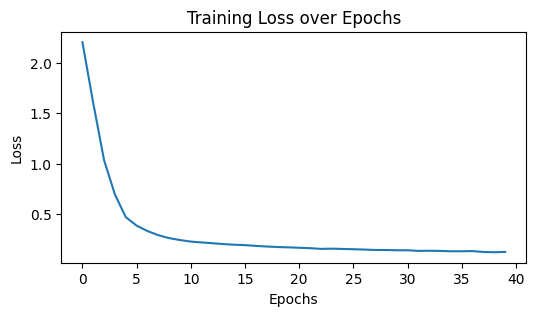

In [11]:
# Plotting loss
loss = history.history['loss']

plt.figure(figsize=(6, 3))
plt.plot(loss)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


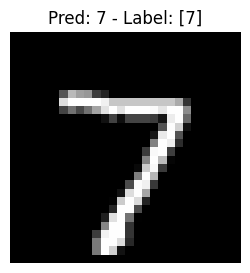

In [12]:
# Prediction
plt.figure(figsize=(3, 3))
plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.title(f"Pred: {np.argmax(model.predict(X_test[0].reshape((1, 784))))} - Label: {y_test[0]}")
plt.axis('off')
plt.show()

In [13]:
pred = model.predict(X_test[0].reshape((1, 784)))
print(f"Detail prediction result: {pred}")
print(f"Prediction: {np.argmax(pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Detail prediction result: [[ 85.77412  154.23483  158.3735   150.25375  107.989586  89.91516
   48.53966  175.48619  151.80688  140.67908 ]]
Prediction: 7


The largest output is `pred[7]`, indicating the predicted digit is a '7'. If the problem only requires a selection, that is sufficient. If the problem requires a probability, a softmax is required.

In [14]:
pred_p = tf.nn.softmax(pred)
print(f"Predicting a Seven. Probability vector: \n{pred_p}")
print(f"Total of predictions: {np.sum(pred_p):0.3f}")
yhat = np.argmax(pred_p)
print(f"np.argmax(pred_p): {yhat}")

Predicting a Seven. Probability vector: 
[[0.0000000e+00 5.8972904e-10 3.6987490e-08 1.1007580e-11 4.8595610e-30
  6.8702755e-38 0.0000000e+00 1.0000000e+00 5.2024517e-11 7.6464989e-16]]
Total of predictions: 1.000
np.argmax(pred_p): 7


In [15]:
# Model's accuracy
prediction_raw = model.predict(X_test)
prediction_processed = np.argmax(prediction_raw, axis=1)
accuracy = accuracy_score(y_test, prediction_processed)
print(f"Model's Accuracy: {(accuracy * 100):.2f} %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
Model's Accuracy: 93.60 %


In [16]:
# Misclassified examples
misclassified_id = np.where(prediction_processed != y_test.flatten())
print(f"There are {len(misclassified_id[0])} misclassified examples out of {len(X_test)}")

There are 640 misclassified examples out of 10000


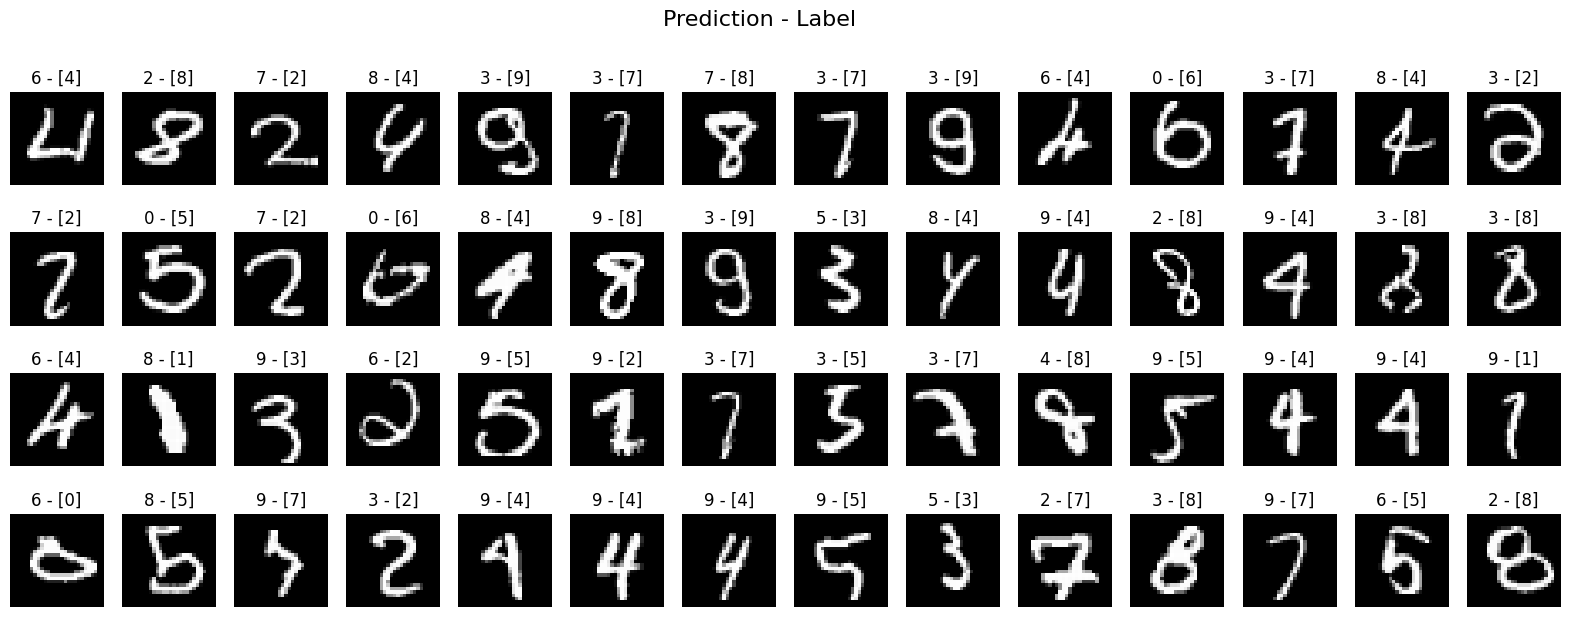

In [17]:
# Visualization
fig, axes = plt.subplots(nrows=4, ncols=14, figsize=(20, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[misclassified_id[0][i]].reshape((28, 28)), cmap='gray')
    ax.set_title(f"{prediction_processed[misclassified_id[0][i]]} - {y_test[misclassified_id[0][i]]}")
    ax.axis('off')
plt.suptitle("Prediction - Label", fontsize=16)
plt.show()